In [89]:
import nextnanopy as nn
import os
import matplotlib.pyplot as plt
import numpy as np

In [90]:
# base_file_path = r"C:\Users\splatt\Documents\nextnano\Output\InGaAsInAlAs_6nm_valence_band_anticrossing_check_sweep_template\InGaAsInAlAs_6nm_valence_band_anticrossing_check_sweep_template.nnp"
base_filename = 'barrier_sweep'
parent_dir = r'C:\Users\splatt\nextnanopy_projects\InGaAsInAlAssinglewell'

input_filepath = os.path.join(parent_dir, base_filename + '.nnp')
base_file_input = nn.InputFile(input_filepath,product='nextnano++')

print(base_file_input)

InputFile
fullpath: C:\Users\splatt\nextnanopy_projects\InGaAsInAlAssinglewell\barrier_sweep.nnp
Input variables: 27 elements
	$run_optics = 0 # if 1 then calculate optical absorption, if 0 the not (ListOfValues:0,1)
	$SELF_CONSISTENT = 0
	$temperature = 100.0 # temperature of the system (DisplayUnit:K)
	$w_well = 6.0 # width of In(0.2)Ga(0.8)As well           (DisplayUnit:nm)
	$w_barrier = 10.0
	$w_middle_barrier = 6.0
	$x_wells_start = $w_barrier
	$x_wells_end = $w_barrier+$w_middle_barrier + 2*$w_well # width of GaAs barrier                  (DisplayUnit:nm)
	$Al_alloy = 0.48 # Al content in AlInAas alloy (DisplayUnit:mole fraction)
	$In_alloy = 0.52 # In content in InGaAs
	$GRID_BUFFER = 6.0
	$FINE_RES = 0.25 # grid spacing around the quantum well (DisplayUnit:nm)
	$COARSE_RES = 2.0 # grid spacing away from the quantum well (DisplayUnit:nm)
	$expected_CB_subband_SW = 2
	$degen_SW = 2
	$expected_VB_subband_SW = 5
	$eigen_e = 2*$expected_CB_subband_SW*$degen_SW # number of eigenvalue

In [91]:
#setup sweep
barrier_widths = [1.0,2.0,5.0,10.0,20.0]
sweep_variable = 'w_middle_barrier'  
barrier_sweep  = nn.Sweep({sweep_variable:barrier_widths},input_filepath)
barrier_sweep.save_sweep()
barrier_sweep.input_files


[InputFile
 fullpath: C:\Users\splatt\nextnanopy_projects\InGaAsInAlAssinglewell\barrier_sweep__w_middle_barrier_1.0_.nnp
 Input variables: 27 elements
 	$run_optics = 0 # if 1 then calculate optical absorption, if 0 the not (ListOfValues:0,1)
 	$SELF_CONSISTENT = 0
 	$temperature = 100.0 # temperature of the system (DisplayUnit:K)
 	$w_well = 6.0 # width of In(0.2)Ga(0.8)As well           (DisplayUnit:nm)
 	$w_barrier = 10.0
 	$w_middle_barrier = 1.0 # THIS VARIABLE IS UNDER SWEEP
 	$x_wells_start = $w_barrier
 	$x_wells_end = $w_barrier+$w_middle_barrier + 2*$w_well # width of GaAs barrier                  (DisplayUnit:nm)
 	$Al_alloy = 0.48 # Al content in AlInAas alloy (DisplayUnit:mole fraction)
 	$In_alloy = 0.52 # In content in InGaAs
 	$GRID_BUFFER = 6.0
 	$FINE_RES = 0.25 # grid spacing around the quantum well (DisplayUnit:nm)
 	$COARSE_RES = 2.0 # grid spacing away from the quantum well (DisplayUnit:nm)
 	$expected_CB_subband_SW = 2
 	$degen_SW = 2
 	$expected_VB_subband_SW =

In [92]:
barrier_sweep.execute_sweep(overwrite = True, show_log = True)


PREPARING...

Checking input files...


Reading environment and checking paths...

RUNNING..
Starting execution as:
C:\Program Files\nextnano\2025_09_18\nextnano++\bin\nextnano++_Intel_64bit.exe --license C:\Users\splatt\Documents\nextnano\activated_license\License_nnp.lic --database C:\Program Files\nextnano\2025_09_18\nextnano++\database\database.nnp --threads 0 --outputdirectory C:\Users\splatt\Documents\nextnano\Output\barrier_sweep_sweep__w_middle_barrier\barrier_sweep__w_middle_barrier_1.0_ --noautooutdir C:\Users\splatt\nextnanopy_projects\InGaAsInAlAssinglewell\barrier_sweep__w_middle_barrier_1.0_.nnp 

nextnano++ 2.3.9 from 2025-09-14 (library 2025-07-29)
COPYRIGHT NOTICE                                                             
ANY USE OF THE NEXTNANO++ CODE CONSTITUTES ACCEPTANCE OF THE TERMS OF THE    
COPYRIGHT NOTICE.                                                            
                                                                             
The terms of co

In [ ]:
class SweepQuantum:
    def __init__(self, sweepvar):
        self.sweep_var_value = sweepvar
        self.Gamma = None
        self.HH = None
        self.LH = None
        self.proabilities_nonegen = None
        self.energies_nonegen = None

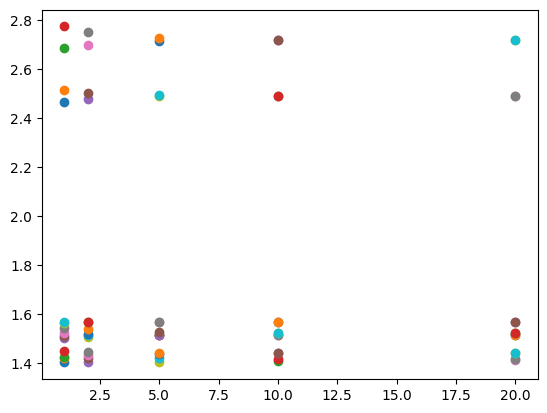

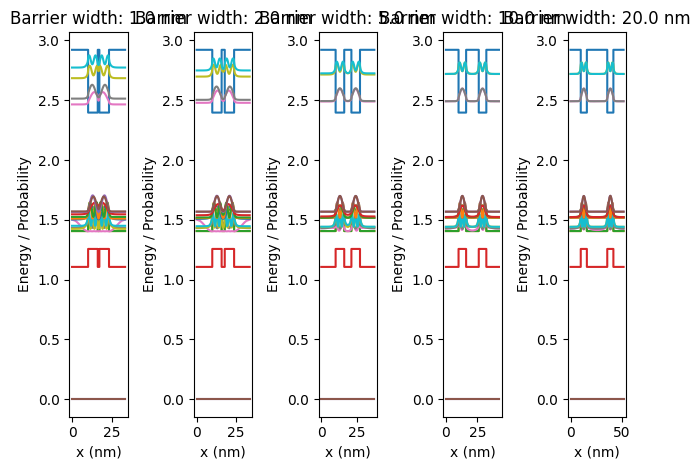

In [ ]:
#now load in each of those sweeps and extract the E1 and E2
fig_compare,ax_compare = plt.subplots()
fig,axs = plt.subplots(1,len(barrier_widths))
filebase_output = nn.config.get('nextnano++','outputdirectory')
#extract E1 and E2 from each sweep and plot
bias = r'bias_00000'
quantum_subfolder = r'Quantum\quantum_region\kp8'
for barrier_ind in range(0,len(barrier_widths)):
    #extract the file
    sweep_bar = SweepOut(sweepvar=barrier_widths[barrier_ind])
    barrier_ind_outpath = os.path.join(barrier_sweep.input_files[barrier_ind].folder_output,bias)

    band_edge = nn.DataFile(os.path.join(barrier_ind_outpath, 'bandedges.dat'),'nextnano++')
    sweep_bar.Gamma = band_edge.variables['Gamma']
    sweep_bar.HH = band_edge.variables['HH']
    sweep_bar.LH = band_edge.variables['LH']

    quantum_sims_path = os.path.join(barrier_ind_outpath, quantum_subfolder)
    energy_spectrum = nn.DataFile(os.path.join(quantum_sims_path, 'energy_spectrum_k00000.dat'),'nextnano++')
    probabilities = nn.DataFile(os.path.join(quantum_sims_path, 'probabilities_shift_k00000.dat'),'nextnano++')

    
    # Plot band edges
    for band_edge_var in band_edge.variables:
          
          axs[barrier_ind].plot(band_edge.coords['x'].value,band_edge_var.value, label=band_edge_var.name)

    # Plot wavefunction probabilities
    non_degen_probabilities = []
    non_degen_E = []
    for psi in probabilities.variables:
        parts = psi.name.split('_')
        if len(parts) > 1 and parts[-1].isdigit():
            num = int(parts[-1])
            if num % 2 == 1:  # odd numbe
                if 'Psi^2' in psi.name:
                    non_degen_probabilities.append(psi)
                    axs[barrier_ind].plot(probabilities.coords['x'].value, psi.value, label=psi.name)
                if 'E' in psi.name:
                    non_degen_E.append(np.mean(psi.value))
                    ax_compare.plot(barrier_widths[barrier_ind], np.mean(psi.value), 'o', label=f"E{num}")

    sweep_bar.proabilities_nonegen = non_degen_probabilities
    sweep_bar.energies_nonegen = non_degen_E
    axs[barrier_ind].set_title(f"Barrier width: {barrier_widths[barrier_ind]} nm")
    axs[barrier_ind].set_xlabel('x (nm)')
    axs[barrier_ind].set_ylabel('Energy / Probability')
#     axs.legend()

ax_compare.legend()
plt.tight_layout()
plt.show()

    # print(energy_spectrum)
    # energies = energy_spectrum.variables['Energy']
    # print(energies.value)
    # axs.plot(band_edge.coords['x'].value, band_edge.variables['Gamma'].value)
    # axs.plot(probabilities.coords['x'].value, probabilities.variables['Psi^2_1'].value)
    # axs.plot(probabilities.coords['x'].value, probabilities.variables['Psi^2_2'].value)
    


In [ ]:
# probabilities.variables
# for prob_var_combo in probabilities.variables:
#     print(prob_var_combo.name)
#     print(type(prob_var_combo))
    

